# パッケージとスクリプトのロード

In [1]:
<<NDSolve`FEM`
<<"./generateFemMesh.wl"

# 1次元領域

## 長さ1の線分

-Graphics--Graphics--Graphics-
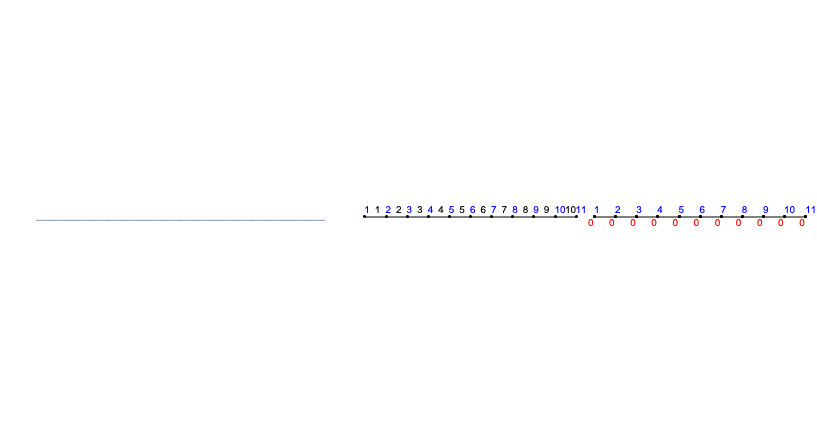

In [3]:
region = ImplicitRegion[-1/2 <= x <= 1/2,{x}];
mesh = generateFemMesh[region, length -> 0.1];

Row[Show[#, ImageSize -> Medium]&/@{
    Region[region],
    showMeshWithId[mesh],
    showPointMarkers[mesh]
}]

# 2次元領域

## 一辺の長さが1の正方形

-Graphics--Graphics--Graphics-
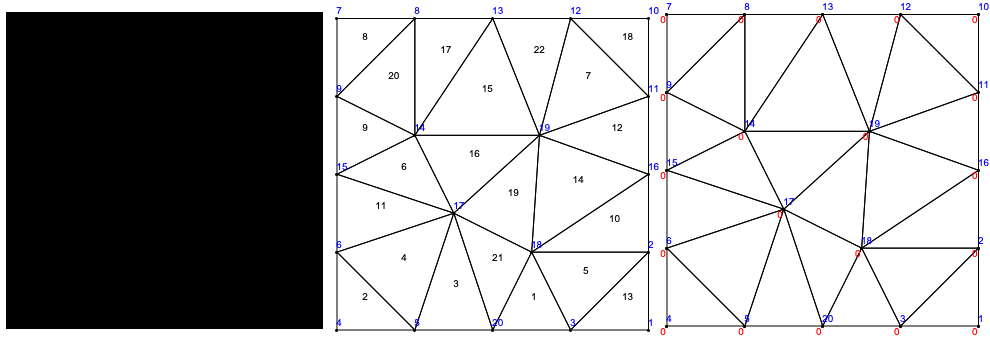

In [6]:
region = Rectangle[{-1/2, -1/2}];
mesh = generateFemMesh[region, meshType -> TriangleElement, area -> 0.1];

Row[Show[#, ImageSize -> 330]&/@{
    Graphics[region],
    showMeshWithId[mesh],
    showPointMarkers[mesh]
}]

## 直径1の円

-Graphics--Graphics--Graphics-
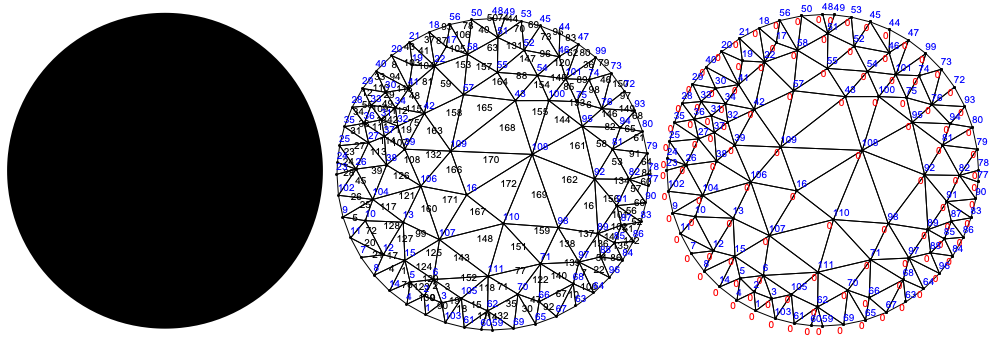

In [9]:
region = Disk[{0,0}, 1/2];
mesh = generateFemMesh[region, meshType -> TriangleElement, area -> 0.1];

Row[Show[#, ImageSize -> 330]&/@{
    Graphics[region],
    showMeshWithId[mesh],
    showPointMarkers[mesh]
}]

## 直径1の円と長辺4短辺$\frac{1}{4}$の長方形の組み合わせ

-Graphics--Graphics--Graphics-
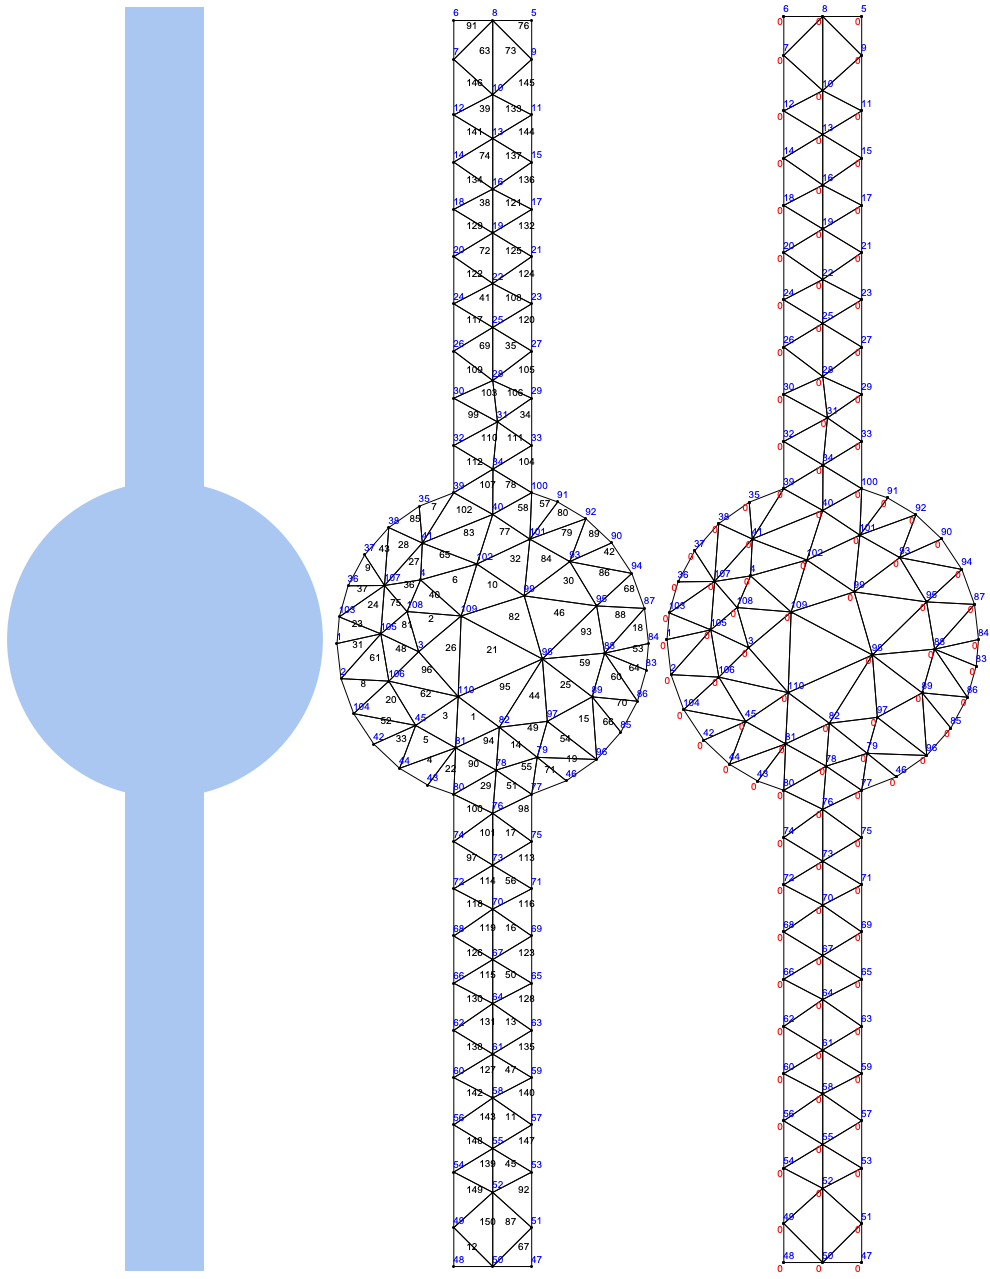

In [12]:
region = RegionUnion[Rectangle[{-1/8, -2}, {1/8, 2}], Disk[{0,0}, 1/2]];
mesh = generateFemMesh[region, meshType -> TriangleElement, area -> 0.1];

Row[Show[#, ImageSize -> 330]&/@{
    Region[region],
    showMeshWithId[mesh],
    showPointMarkers[mesh]
}]

# 3次元領域

## 一辺の長さが1の立方体

-Graphics3D--Graphics3D--Graphics3D-
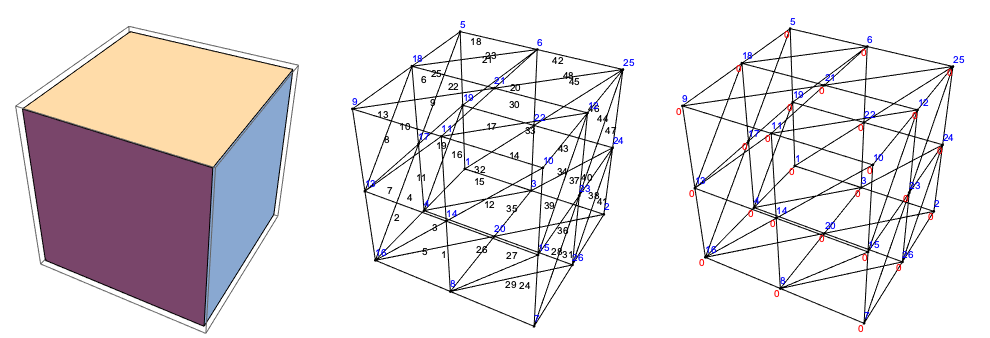

In [15]:
region = Cuboid[{-1/2, -1/2, -1/2}];
mesh = generateFemMesh[region, meshType -> TetrahedronElement, volume -> 0.5];

Row[Show[#, ImageSize -> 330]&/@{
    Graphics3D[region],
    showMeshWithId[mesh],
    showPointMarkers[mesh]
}]

## 直径1の球

-Graphics3D--Graphics3D--Graphics3D-
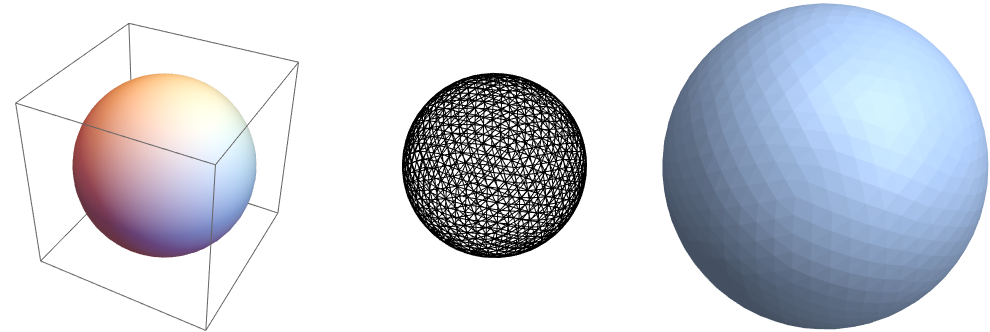

In [18]:
region = Ball[{0, 0, 0}, 1/2];
mesh = generateFemMesh[region, meshType -> TetrahedronElement, volume -> 0.5];

Row[Show[#, ImageSize -> 330]&/@{
    Graphics3D[region],
    mesh["Wireframe"],
    MeshRegion[mesh]
}]

## 直径1の球と直径$\frac{1}{4}$長さ4の円柱の組み合わせ

-Graphics3D--Graphics3D--Graphics3D-
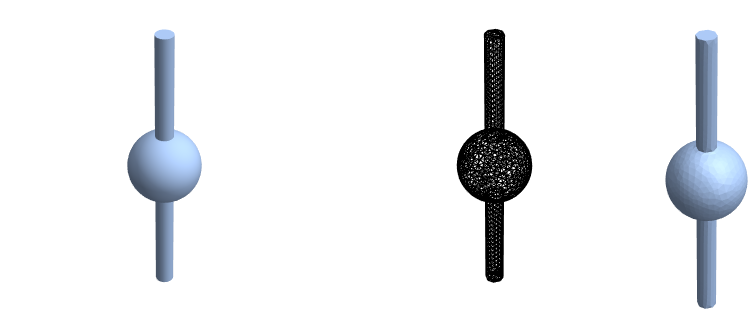

In [21]:
region = RegionUnion[Ball[{0, 0, 0}, 1/2], Cylinder[{{0, 0, -2}, {0, 0, 2}}, 1/8]];
mesh = generateFemMesh[region, continuationBoundaryMeshGenerator -> True, meshType -> TetrahedronElement, volume -> 0.1];

Row[Join[Show[#, ImageSize -> 330]&/@{
    Region[region],
    mesh["Wireframe"]},
    {Show[MeshRegion[mesh]]}]]

-Graphics3D--Graphics3D--Graphics3D-
-Graphics3D-
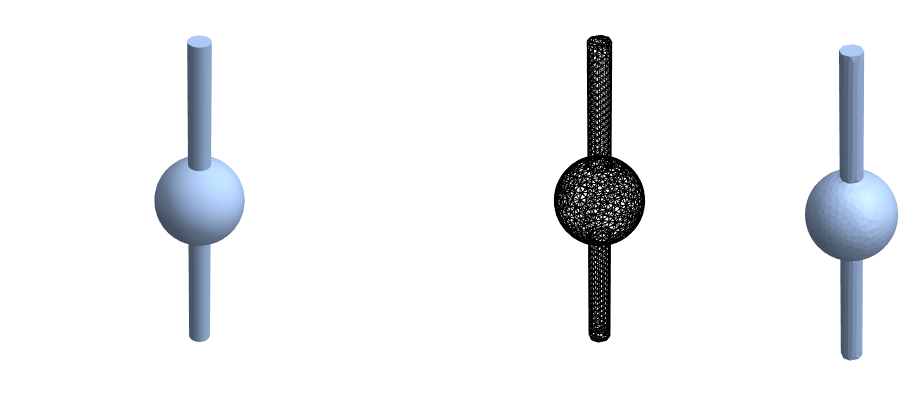
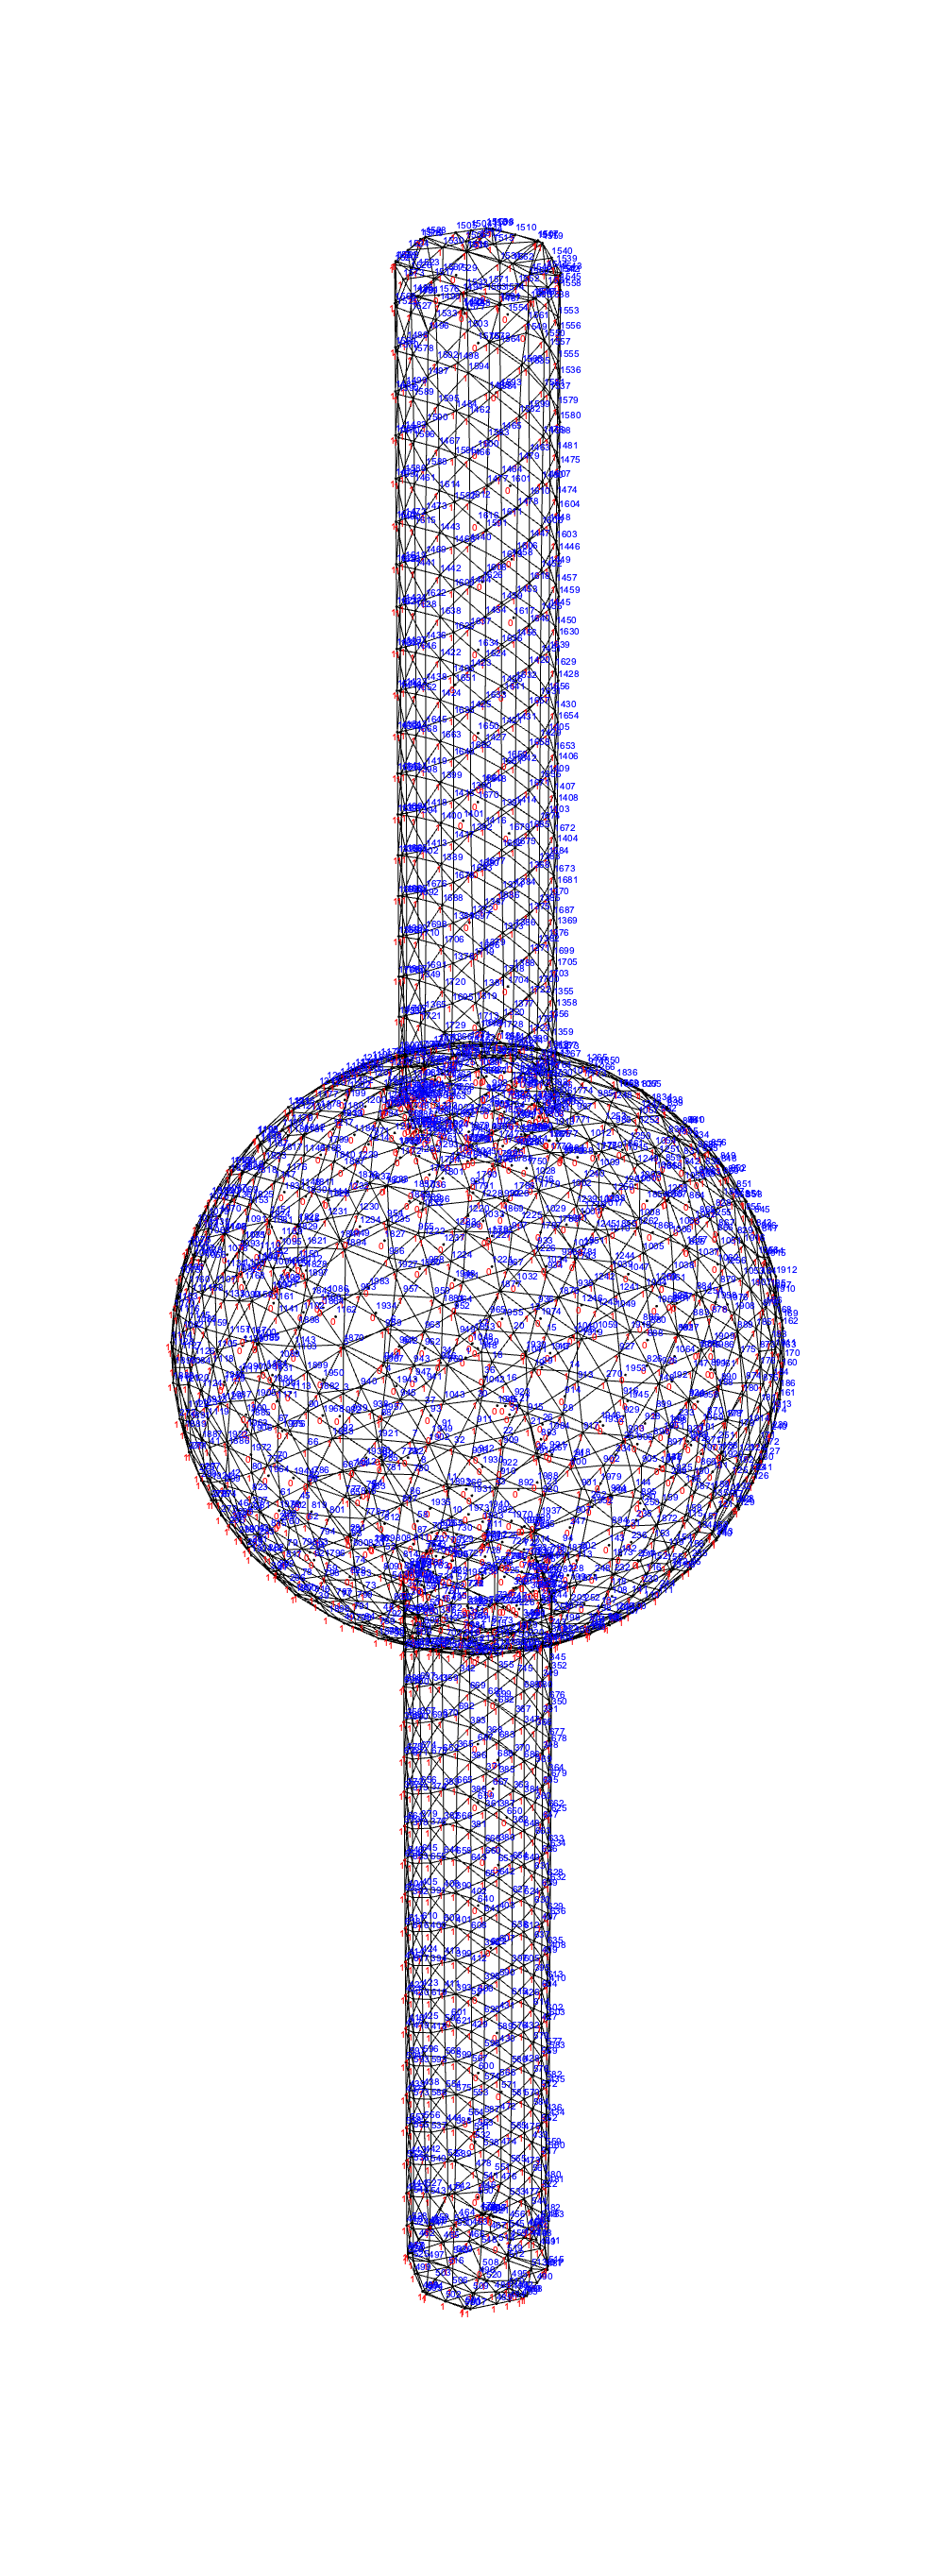

In [24]:
region = RegionUnion[Ball[{0, 0, 0}, 1/2], Cylinder[{{0, 0, -2}, {0, 0, 2}}, 1/8]];

pmFunc := If[Chop[Abs[#[[3]]] - 2]== 0 || Chop[Norm[#] - 0.5] == 0 || Chop[Sqrt[#[[1]]^2+#[[2]]^2] - 1/8] == 0, 1, 0]&

mesh = generateFemMesh[region, pointMarkerFunction -> pmFunc, continuationBoundaryMeshGenerator -> True, meshType -> TetrahedronElement, volume -> 0.1];

Row[Join[Show[#, ImageSize -> 400]&/@{
    Region[region],
    mesh["Wireframe"]},
    {Show[MeshRegion[mesh], ImageSize -> 100]}]]
Show[showPointMarkers[mesh], ImageSize -> 1000]